In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
##KLeach 3/28/2024

# Path to dataset
enrollment_path = '../data/enrollment_training_data.xlsx'

# Load the data into Pandas DataFrames
enrollment_data = pd.read_excel(enrollment_path)

# Display the first few rows of the DataFrames to verify
enrollment_data.head(1000)

,YEAR,COUNTY_DISTRICT_CODE,DISTRICT_NAME,SCHOOL_CODE,SCHOOL_NAME,GRADE,TOTAL_ENROLLMENT,COHORT_SURVIVAL_RATE,RESIDENT_ESTIMATE,ENROLLMENT_RESIDENT_PROPORTION
0,2010,39141,SPRINGFIELD R-XII,1050,CENTRAL HIGH,6,41,1.000000,29567.0,0.001387
1,2010,39141,SPRINGFIELD R-XII,1050,CENTRAL HIGH,7,43,1.048780,29567.0,0.001454
2,2010,39141,SPRINGFIELD R-XII,1050,CENTRAL HIGH,8,40,1.025641,29567.0,0.001353
3,2010,39141,SPRINGFIELD R-XII,1050,CENTRAL HIGH,9,472,1.145631,29567.0,0.015964
4,2010,39141,SPRINGFIELD R-XII,1050,CENTRAL HIGH,10,356,0.887781,29567.0,0.012040
...,...,...,...,...,...,...,...,...,...,...
995,2015,39141,SPRINGFIELD R-XII,3140,REED MIDDLE,0-12,603,1.065371,29954.0,0.020131
996,2016,39141,SPRINGFIELD R-XII,3140,REED MIDDLE,6,215,0.964126,29822.0,0.007209
997,2016,39141,SPRINGFIELD R-XII,3140,REED MIDDLE,7,218,1.117949,29822.0,0.007310
998,2016,39141,SPRINGFIELD R-XII,3140,REED MIDDLE,8,193,1.043243,29822.0,0.006472


In [5]:
# Summary statistics
print(enrollment_data.describe())

              YEAR  COUNTY_DISTRICT_CODE  SCHOOL_CODE  TOTAL_ENROLLMENT  \
count  5068.000000                5068.0  5068.000000       5068.000000   
mean   2016.458169               39141.0  3961.314128        201.197119   
std       4.011876                   0.0  1052.381545        273.500657   
min    2010.000000               39141.0  1050.000000         14.000000   
25%    2013.000000               39141.0  4060.000000         47.000000   
50%    2016.000000               39141.0  4320.000000         75.000000   
75%    2020.000000               39141.0  4600.000000        280.000000   
max    2023.000000               39141.0  4840.000000       2031.000000   

       COHORT_SURVIVAL_RATE  RESIDENT_ESTIMATE  ENROLLMENT_RESIDENT_PROPORTION  
count           5055.000000        4356.000000                     4356.000000  
mean               1.012135       30414.719008                        0.006629  
std                0.185675        1690.335166                        0.008973  


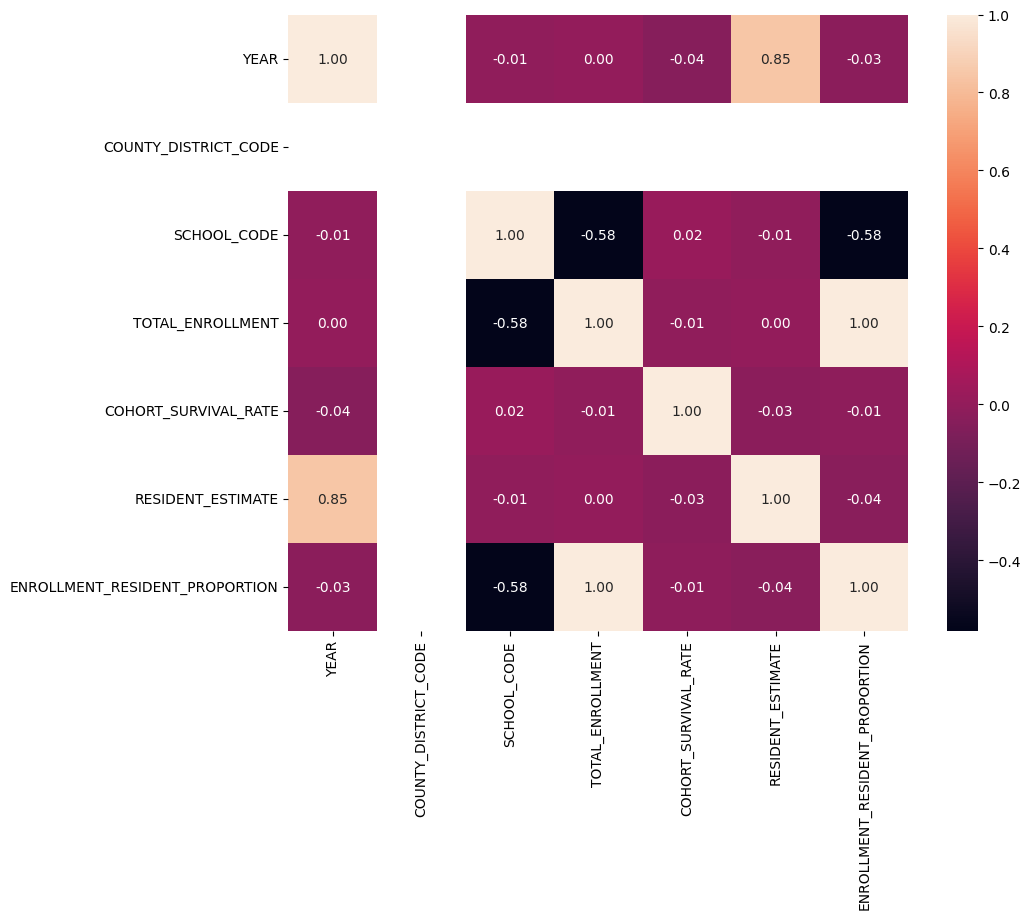

In [8]:
# Select only numeric columns for correlation calculation
numeric_data = enrollment_data.select_dtypes(include=[np.number])

# Calculate correlation matrix for numeric columns only
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.show()

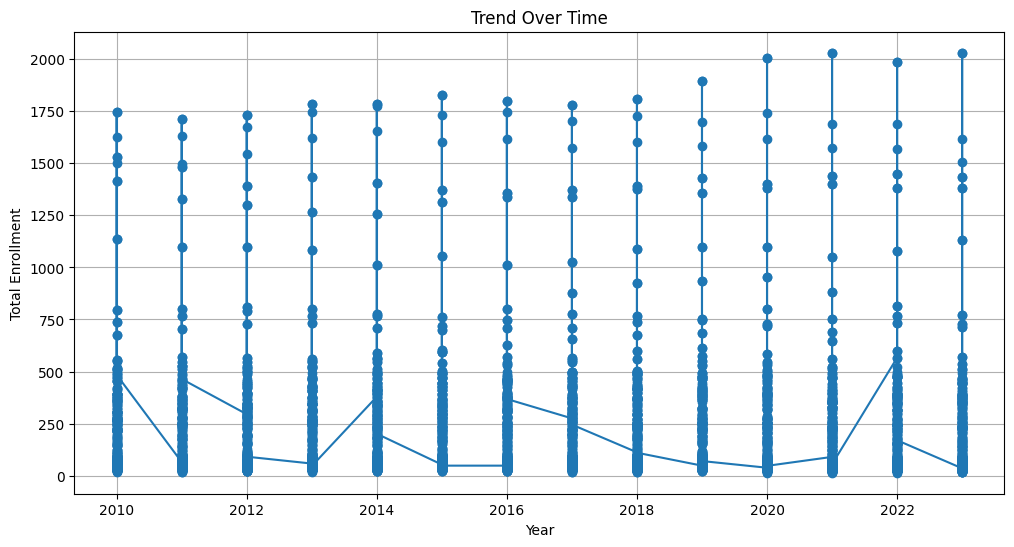

In [15]:
# Ensure the data is sorted by year
enrollment_data_sorted = enrollment_data.sort_values('YEAR')  # Replace 'YearColumn' with your actual year column name

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(enrollment_data_sorted['YEAR'], enrollment_data_sorted['TOTAL_ENROLLMENT'], marker='o')  # Replace 'MetricColumn' with your metric column name
plt.title('Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Total Enrollment')  # Replace 'Metric' with the actual metric to analyze
plt.grid(True)
plt.show()

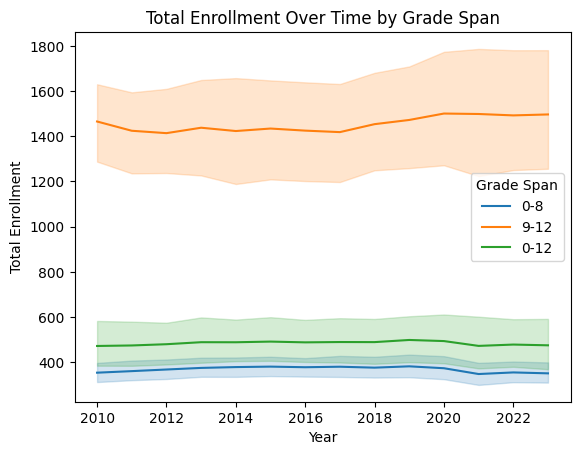

In [26]:
# First, filter the data to include only the categories of interest
filtered_data = enrollment_data[enrollment_data['GRADE'].isin(['0-8', '0-12', '9-12'])]
sns.lineplot(data=filtered_data, x='YEAR', y='TOTAL_ENROLLMENT', hue='GRADE')
plt.title('Total Enrollment Over Time by Grade Span')
plt.xlabel('Year')
plt.ylabel('Total Enrollment')
plt.legend(title='Grade Span')
plt.show()

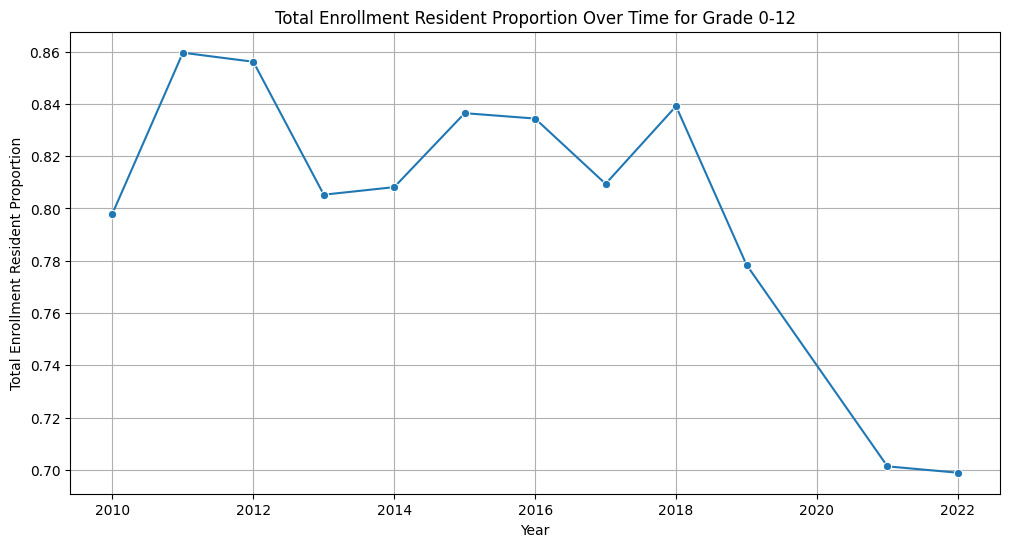

In [25]:

# Filter out the year 2020 and the '0-12' grade category
filtered_data = enrollment_data[
    (enrollment_data['GRADE'] == '0-12') & 
    (~enrollment_data['YEAR'].isin([2020, 2023]))
]
# Aggregate the data by 'YEAR' and sum the 'ENROLLMENT_RESIDENT_PROPORTION' for each year
aggregated_data = filtered_data.groupby('YEAR')['ENROLLMENT_RESIDENT_PROPORTION'].sum().reset_index()

# Plot the time series with the aggregated data
plt.figure(figsize=(12, 6))
sns.lineplot(data=aggregated_data, x='YEAR', y='ENROLLMENT_RESIDENT_PROPORTION', marker='o')
plt.title('Total Enrollment Resident Proportion Over Time for Grade 0-12')
plt.xlabel('Year')
plt.ylabel('Total Enrollment Resident Proportion')
plt.grid(True)
plt.show()

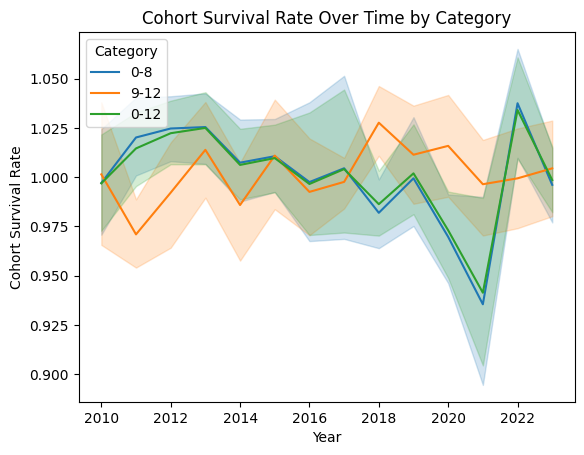

In [21]:
# First, filter the data to include only the categories of interest
filtered_data = enrollment_data[enrollment_data['GRADE'].isin(['0-8', '0-12', '9-12'])]
sns.lineplot(data=filtered_data, x='YEAR', y='COHORT_SURVIVAL_RATE', hue='GRADE')
plt.title('Cohort Survival Rate Over Time by Grade Span')
plt.xlabel('Year')
plt.ylabel('Cohort Survival Rate')
plt.legend(title='Grade Span')
plt.show()

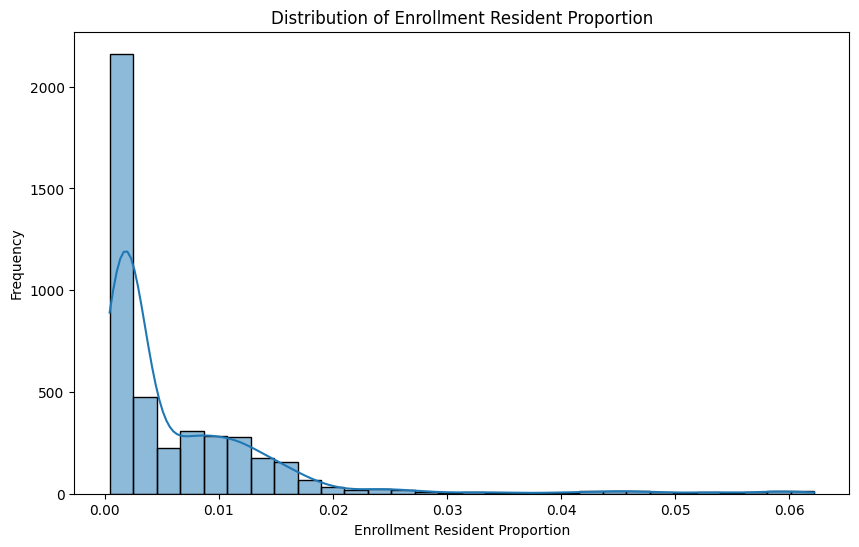

In [27]:
# Plot a histogram to see the distribution
plt.figure(figsize=(10, 6))
sns.histplot(enrollment_data['ENROLLMENT_RESIDENT_PROPORTION'].dropna(), kde=True, bins=30)  # Adjust bins if necessary
plt.title('Distribution of Enrollment Resident Proportion')
plt.xlabel('Enrollment Resident Proportion')
plt.ylabel('Frequency')
plt.show()

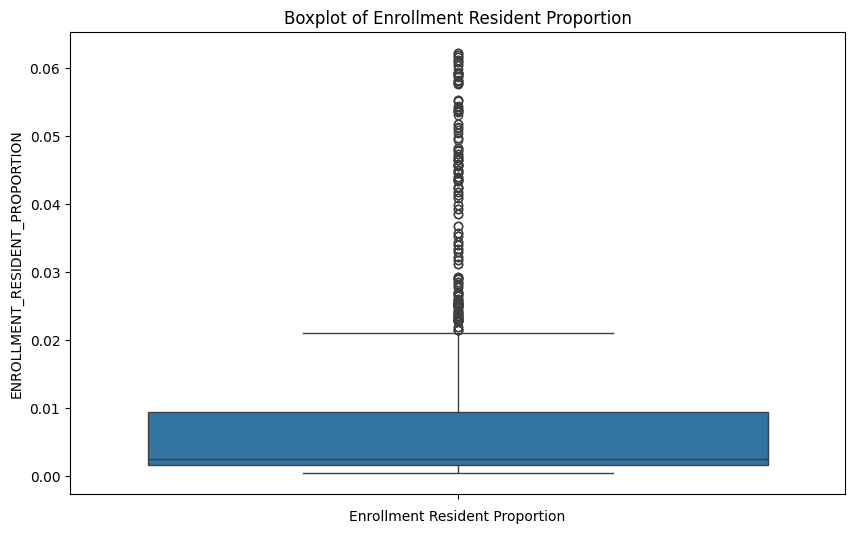

In [28]:
# Plot a boxplot to view the distribution and identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(enrollment_data['ENROLLMENT_RESIDENT_PROPORTION'].dropna())
plt.title('Boxplot of Enrollment Resident Proportion')
plt.xlabel('Enrollment Resident Proportion')
plt.show()


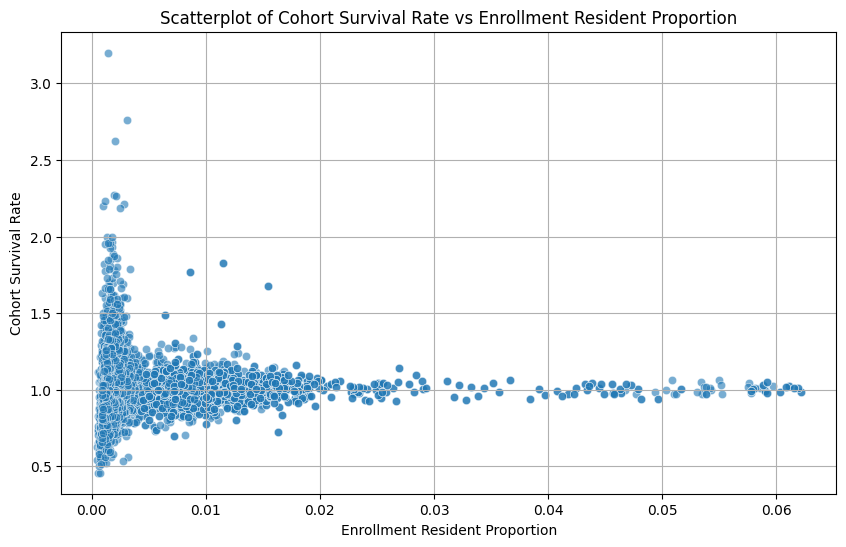

In [29]:
# Make sure both columns are numeric and there are no NaN values for the plot
enrollment_data.dropna(subset=['COHORT_SURVIVAL_RATE', 'ENROLLMENT_RESIDENT_PROPORTION'], inplace=True)

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=enrollment_data,
    x='ENROLLMENT_RESIDENT_PROPORTION', 
    y='COHORT_SURVIVAL_RATE', 
    alpha=0.6  # This sets the transparency of the points
)
plt.title('Scatterplot of Cohort Survival Rate vs Enrollment Resident Proportion')
plt.xlabel('Enrollment Resident Proportion')
plt.ylabel('Cohort Survival Rate')
plt.grid(True)
plt.show()

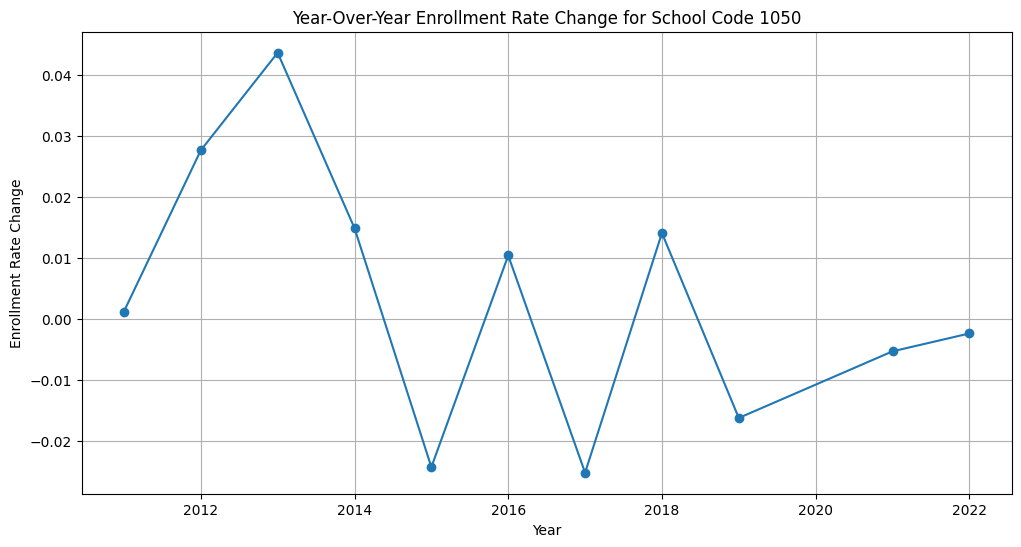

In [33]:
# Filter the DataFrame for the '0-12' grade
grade_0_12_data = enrollment_data[enrollment_data['GRADE'] == '0-12']

# Sort the DataFrame
grade_0_12_sorted = grade_0_12_data.sort_values(['SCHOOL_CODE', 'YEAR'])

# Calculate the year-over-year percentage change for each school's total enrollment
grade_0_12_sorted['ENROLLMENT_RATE_CHANGE'] = grade_0_12_sorted.groupby('SCHOOL_CODE')['TOTAL_ENROLLMENT'].pct_change()

# To visualize the acceleration or deceleration in trends, look at individual schools
school_code_example = 1050  # Replace with actual school code
school_data = grade_0_12_sorted[grade_0_12_sorted['SCHOOL_CODE'] == school_code_example]

plt.figure(figsize=(12, 6))
plt.plot(school_data['YEAR'], school_data['ENROLLMENT_RATE_CHANGE'], marker='o')
plt.title(f'Year-Over-Year Enrollment Rate Change for School Code {school_code_example}')
plt.xlabel('Year')
plt.ylabel('Enrollment Rate Change')
plt.grid(True)
plt.show()